In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
!pip install mediapipe
import mediapipe as mp
import os
import json

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 31.5 MB 1.2 MB/s 


In [ ]:
input_json_path = '/content/drive/Shareddrives/URSI 2022/Eye Tracking ML/json_inputs/'

all_input_json_files = os.listdir(input_json_path)

input_json_data = {}
with open(input_json_path + all_input_json_files[40], 'r') as file:
    s_data = json.load(file)
    input_json_data = {**input_json_data, **s_data}

In [ ]:
calibration_points = [[10, 50], [10, 10], [90, 10], [50, 90],
                   [30, 70], [50, 50], [50, 10], [90, 90],
                   [70, 70], [70, 30], [10, 90], [90, 50],
                   [30, 30]]

In [ ]:
train_y = []

for subject in input_json_data:
    for y in input_json_data[subject]['y']:
        for element in calibration_points:
            train_y.append(element)

print(len(train_y))
#print(train_y)

1170


In [ ]:
train_x = []

for subject in input_json_data:
    for sample in input_json_data[subject]['x']:
        calibration_arr = []
        i = 0
        while (i < 13):
            total_arr = []
            head_pose = np.array(sample[i][0])
            iris_points = np.array(sample[i][1])
            head_pose = head_pose.flatten()
            iris_points = iris_points.flatten()
            for element in head_pose:
                total_arr.append(element)
            for element in iris_points:
                total_arr.append(element)
            calibration_arr.append(total_arr)
            i += 1
        #train_x.append(calibration_arr[0])
        for element in calibration_arr:
            train_x.append(element)

In [ ]:
print(np.shape(train_x))
print(np.shape(train_y))

(1170, 22)
(1170, 2)


In [ ]:
train_x = np.array(train_x)
mean = train_x.mean(axis=0)
train_x -= mean
std = train_x.std(axis=0)
train_x /= std
train_y = np.array(train_y)

In [ ]:
from sklearn.utils import shuffle

train_x, train_y = shuffle(train_x, train_y)

In [ ]:
print(np.shape(train_x))
print(np.shape(train_y))

(1170, 22)
(1170, 2)


In [ ]:
val_y = []

for subject in input_json_data:
    for y in input_json_data[subject]['y']:
        val_y.append(y)

In [ ]:
val_x = []

for subject in input_json_data:
    for sample in input_json_data[subject]['x']:
        calibration_arr = []
        i = 0
        while (i <= 13):
            if (i == 13):
                total_arr = []
                head_pose = np.array(sample[i][0])
                iris_points = np.array(sample[i][1])
                head_pose = head_pose.flatten()
                iris_points = iris_points.flatten()
                for element in head_pose:
                    total_arr.append(element)
                for element in iris_points:
                    total_arr.append(element)
                calibration_arr.append(total_arr)
            i += 1
        #train_x.append(calibration_arr[0])
        for element in calibration_arr:
            val_x.append(element)

In [ ]:
print(np.shape(val_x))
print(np.shape(val_y))

(90, 22)
(90, 2)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([layers.Dense(128, activation="relu"), layers.Dense(64, activation="relu"), layers.Dense(16, activation="relu"), layers.Dense(2, activation="relu")])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2), loss="MeanSquaredError", metrics=["mae"])

history = model.fit(train_x, train_y, epochs=70, batch_size=40000, validation_data=(val_x, val_y))

Epoch 1/70
1/1 [==============================] - 1s 1s/step - loss: 3332.2942 - mae: 49.7203 - val_loss: 3077.7424 - val_mae: 49.5610
Epoch 2/70
1/1 [==============================] - 0s 53ms/step - loss: 2863.4006 - mae: 44.9621 - val_loss: 2547.3933 - val_mae: 43.9905
Epoch 3/70
1/1 [==============================] - 0s 56ms/step - loss: 1538.2106 - mae: 32.6958 - val_loss: 1629.6653 - val_mae: 33.9060
Epoch 4/70
1/1 [==============================] - 0s 50ms/step - loss: 1668.2767 - mae: 31.6194 - val_loss: 2464.2100 - val_mae: 43.1774
Epoch 5/70
1/1 [==============================] - 0s 55ms/step - loss: 1510.8148 - mae: 31.8950 - val_loss: 1986.5226 - val_mae: 38.0685
Epoch 6/70
1/1 [==============================] - 0s 63ms/step - loss: 906.5484 - mae: 26.4438 - val_loss: 1675.0880 - val_mae: 34.5320
Epoch 7/70
1/1 [==============================] - 0s 48ms/step - loss: 804.3290 - mae: 25.0711 - val_loss: 1705.8833 - val_mae: 34.8949
Epoch 8/70
1/1 [=============================

37/37 [==============================] - 0s 2ms/step


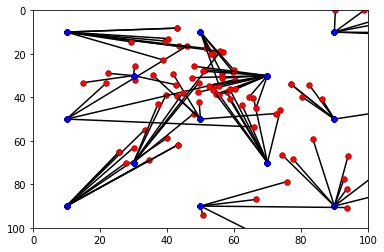

In [ ]:
plt.xlim(0, 100)
plt.ylim(100, 0)
x2 = []
y2 = []
sample_num = 0
while sample_num < 90:
    x = [train_y[sample_num][0]]
    x2 = [(train_y[sample_num][0])]
    x.append(model.predict(train_x)[sample_num][0])
    x3 = [model.predict(train_x)[sample_num][0]]
    y = [train_y[sample_num][1]]
    y2 = [(train_y[sample_num][1])]
    y.append(model.predict(train_x)[sample_num][1])
    y3 = [model.predict(train_x)[sample_num][1]]
    plt.plot(x, y, color="black", marker="o", markersize=5)
    plt.plot(x3, y3, color="red", marker="o", markersize=5)
    plt.plot(x2, y2, color="blue", marker="o", markersize=5)
    sample_num += 1

3/3 [==============================] - 0s 5ms/step


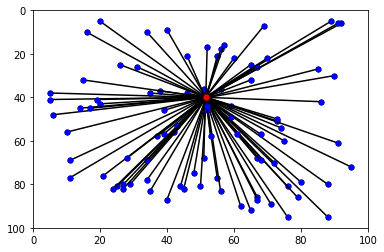

In [ ]:
plt.xlim(0, 100)
plt.ylim(100, 0)
x2 = []
y2 = []
sample_num = 0
while sample_num < 90:
    x = [val_y[sample_num][0]]
    x2 = [(val_y[sample_num][0])]
    x.append(model.predict(val_x)[sample_num][0])
    x3 = [model.predict(val_x)[sample_num][0]]
    y = [val_y[sample_num][1]]
    y2 = [(val_y[sample_num][1])]
    y.append(model.predict(val_x)[sample_num][1])
    y3 = [model.predict(val_x)[sample_num][1]]
    plt.plot(x, y, color="black", marker="o", markersize=5)
    plt.plot(x3, y3, color="red", marker="o", markersize=5)
    plt.plot(x2, y2, color="blue", marker="o", markersize=5)
    sample_num += 1



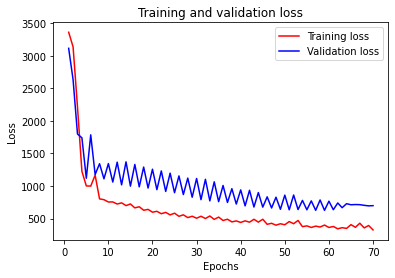

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

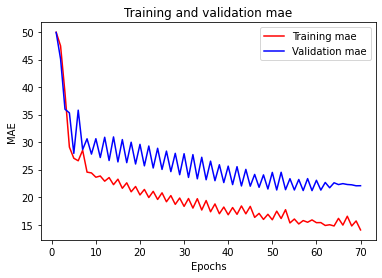

In [ ]:
plt.clf()
acc = history_dict["mae"]
val_acc = history_dict["val_mae"]
plt.plot(epochs, acc, "r", label="Training mae")
plt.plot(epochs, val_acc, "b", label="Validation mae")
plt.title("Training and validation mae")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()